# Exercici 2.4. Visualització de dades sobre dataset diamonds.

Importa seaborn com a sns, matplotlib.pyplot com a plt i aplica %matplotlib inline

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
sns.set_theme(style="whitegrid")

Importa el dataset de seaborn 'diamonds'. Anomena'l diamonds_df i mostra la informació general.

In [2]:
# Load diamonds dataset and show basic info
diamonds_df = sns.load_dataset('diamonds')
diamonds_df.info()
diamonds_df.head() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   carat    53940 non-null  float64 
 1   cut      53940 non-null  category
 2   color    53940 non-null  category
 3   clarity  53940 non-null  category
 4   depth    53940 non-null  float64 
 5   table    53940 non-null  float64 
 6   price    53940 non-null  int64   
 7   x        53940 non-null  float64 
 8   y        53940 non-null  float64 
 9   z        53940 non-null  float64 
dtypes: category(3), float64(6), int64(1)
memory usage: 3.0 MB


,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


Representa la relació entre carat i price utilitzant un gràfic de densitat en hexàgons.

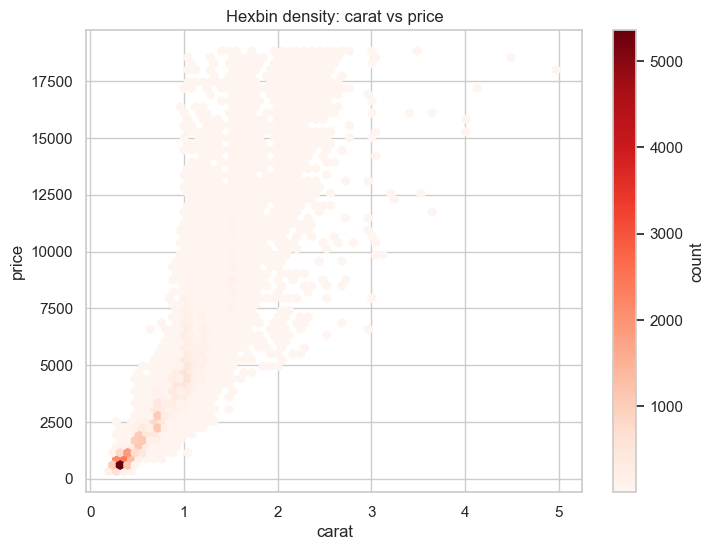

In [11]:
# Hexbin density of carat vs price
plt.figure(figsize=(8,6))
plt.hexbin(diamonds_df['carat'], diamonds_df['price'], gridsize=60, cmap='Reds', mincnt=1)
plt.colorbar(label='count')
plt.xlabel('carat')
plt.ylabel('price')
plt.title('Hexbin density: carat vs price')
plt.show()

Compara la distribució conjunta de carat i price segons el color.

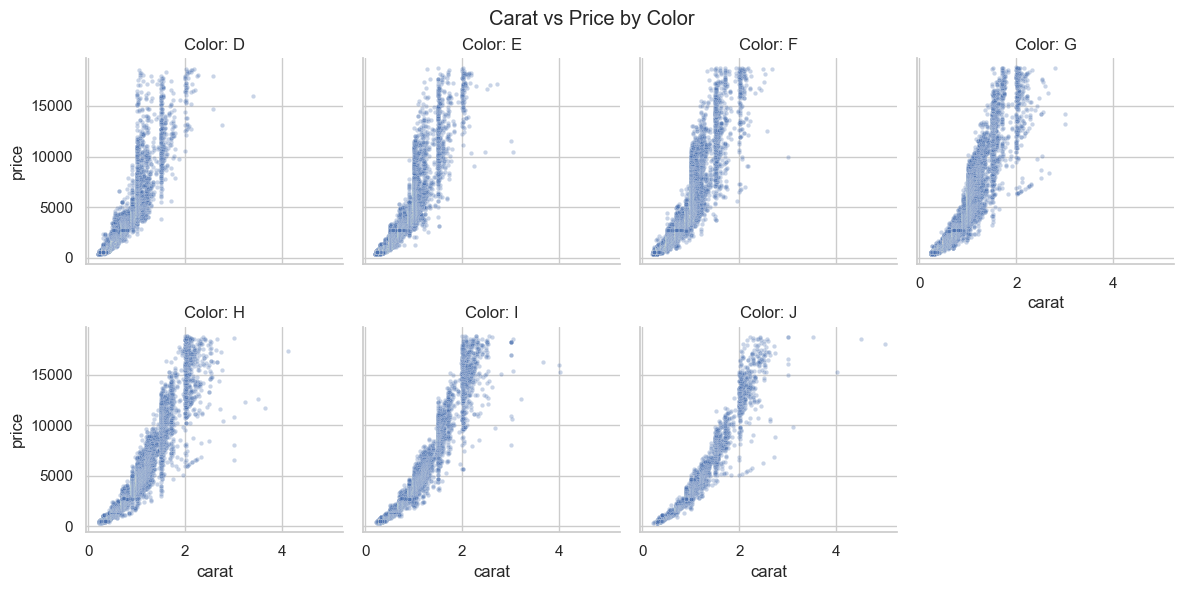

In [4]:
# Compare joint distribution of carat and price by color using facets
g = sns.FacetGrid(diamonds_df, col='color', col_wrap=4, height=3, sharex=True, sharey=True)
g.map_dataframe(sns.scatterplot, 'carat', 'price', alpha=0.3, s=10)
g.set_titles(col_template="Color: {col_name}")
g.set_axis_labels('carat','price')
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Carat vs Price by Color')
plt.show()

Mostra com varia el preu mitjà segons la qualitat del tall (cut) i la claredat (clarity).

C:\Users\alanr\AppData\Local\Temp\ipykernel_22400\93586639.py:2: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot = diamonds_df.pivot_table(index='cut', columns='clarity', values='price', aggfunc='mean')


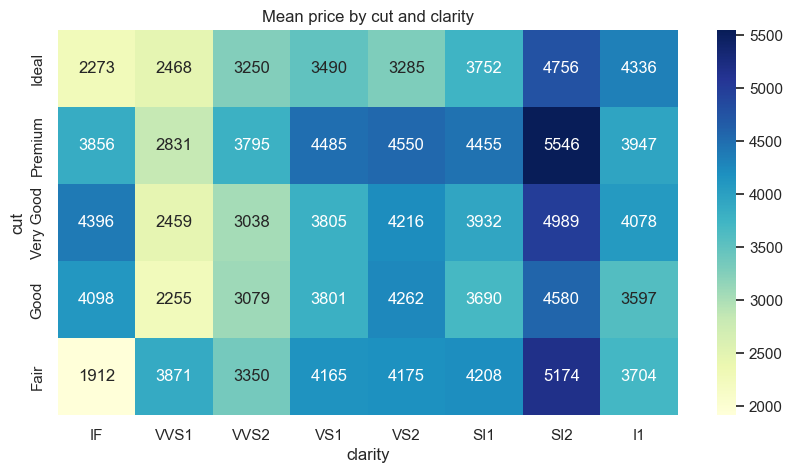

In [5]:
# Mean price by cut and clarity (heatmap)
pivot = diamonds_df.pivot_table(index='cut', columns='clarity', values='price', aggfunc='mean')
plt.figure(figsize=(10,5))
sns.heatmap(pivot, annot=True, fmt='.0f', cmap='YlGnBu')
plt.title('Mean price by cut and clarity')
plt.ylabel('cut')
plt.xlabel('clarity')
plt.show()

Mostra la distribució acumulada de price.

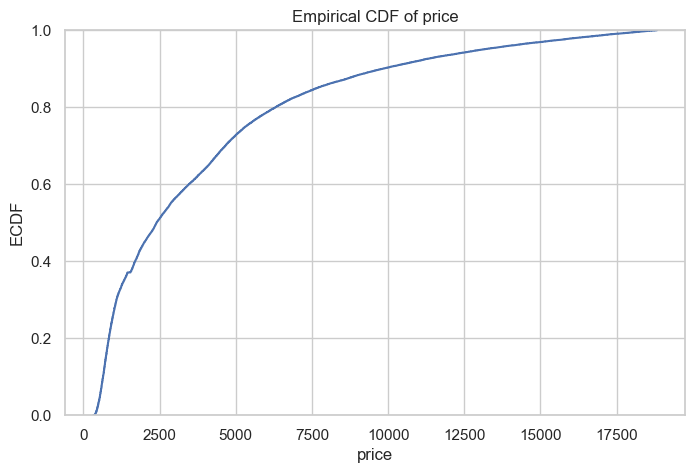

In [6]:
# Empirical CDF of price
plt.figure(figsize=(8,5))
sns.ecdfplot(data=diamonds_df, x='price')
plt.title('Empirical CDF of price')
plt.xlabel('price')
plt.ylabel('ECDF')
plt.show()

Crea gràfics separats per cada color, mostrant carat vs price amb una línia de regressió.

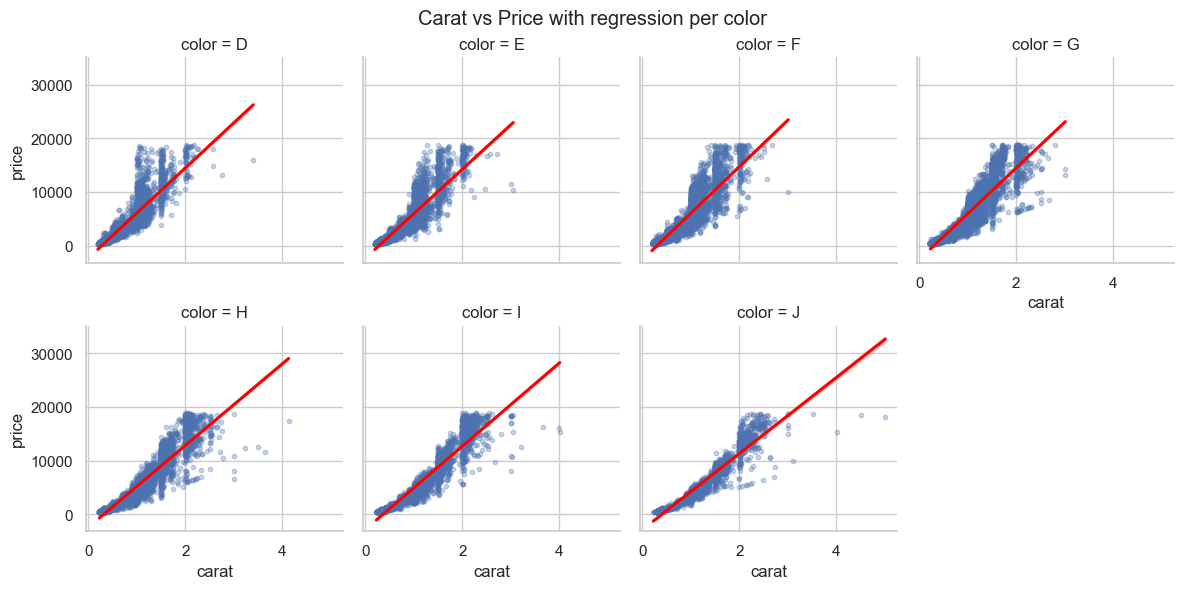

In [7]:
# Separate plots per color with regression line (lmplot)
sns.lmplot(data=diamonds_df, x='carat', y='price', col='color', col_wrap=4, height=3, scatter_kws={'s':10,'alpha':0.3}, line_kws={'color':'red'})
plt.subplots_adjust(top=0.9)
plt.suptitle('Carat vs Price with regression per color')
plt.show()

Mostra la distribució dels preus amb escala logarítmica.

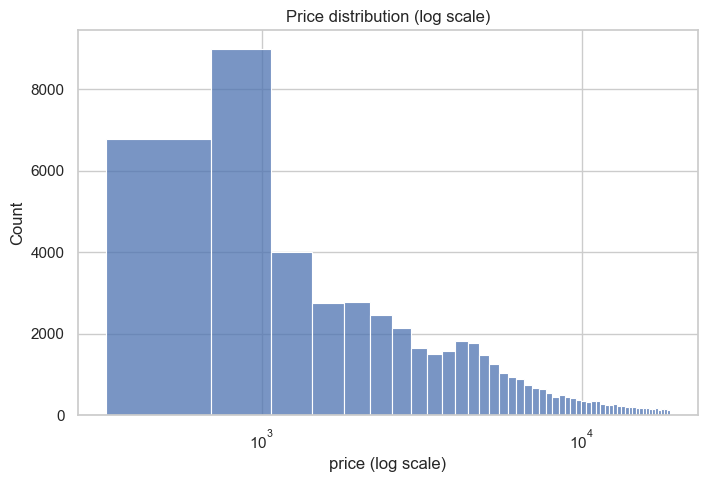

In [8]:
# Price distribution with logarithmic x-scale
plt.figure(figsize=(8,5))
sns.histplot(diamonds_df['price'], bins=50, kde=False)
plt.xscale('log')
plt.title('Price distribution (log scale)')
plt.xlabel('price (log scale)')
plt.show()

Gràfic heatmap de correlacions entre variables numèriques

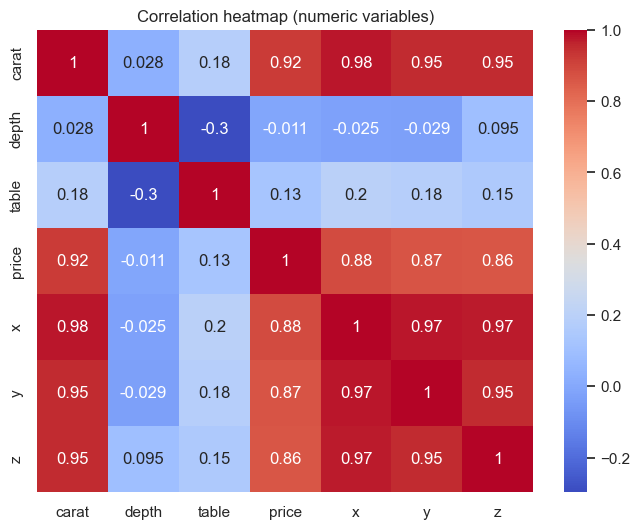

In [9]:
# Heatmap of correlations between numeric variables
num_cols = diamonds_df.select_dtypes(include=[np.number])
corr = num_cols.corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation heatmap (numeric variables)')
plt.show()

Gràfic jointplot amb tipus 'hex'

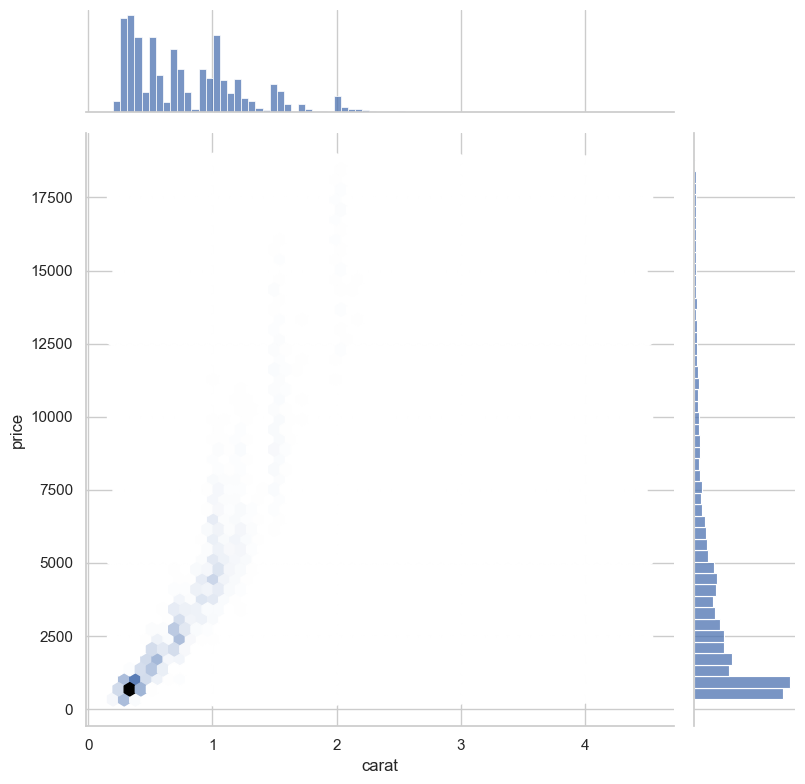

In [10]:
# Jointplot with hex bins for carat vs price
sns.jointplot(data=diamonds_df.sample(frac=0.2, random_state=1), x='carat', y='price', kind='hex', height=8)
plt.show()